In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble               import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,VotingClassifier,HistGradientBoostingClassifier
from sklearn.multiclass             import OneVsRestClassifier
from sklearn.neighbors              import KNeighborsClassifier
from sklearn.linear_model           import LogisticRegression,Perceptron,PassiveAggressiveClassifier,SGDClassifier
from sklearn.tree                   import DecisionTreeClassifier
from sklearn.svm                    import SVC,NuSVC
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.naive_bayes            import GaussianNB,BernoulliNB

from sklearn.model_selection import GridSearchCV,train_test_split

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report


In [2]:
def     data_frame(pair_name):
    folder_path=f"C:\\Users\\manch\\OneDrive\\Documents\\dev\\Trading\\Synthetics\\Step_index\\data_files\\labeled"
    file        =   folder_path+f"\\{pair_name}"
    df          =   pd.read_csv(file,sep=' ')
    return df

In [5]:
dfMain=data_frame(pair_name="dfUltimate_Moving Average Trends_STEP_2024_M1_9_3_14_20_99999.csv")
dfMain.keys()

Index(['Time Stamps', 'Instance', 'Closes', 'Ma', 'Ma Close Diff',
       'Linear Reg Slope', 'Trend Change', 'WPR', 'CCI', 'MBand', 'UBand',
       'LBand', 'diffsFromTop', 'diffsFromBot', 'RSI', 'diffsFromMid',
       'Slope Ma', 'Slope Ma Close diff', 'Slope Trend', 'Slope Linear Reg',
       'Peak'],
      dtype='object')

In [12]:
y=dfMain["Peak"]
dfMain.pop('Trend Change')
dfMain.pop('Slope Trend')
dfMain.pop('Time Stamps')
dfMain.pop('Instance')
dfMain.pop("Peak")
X=dfMain

In [13]:
scaler = StandardScaler()
X =scaler.fit_transform(X.astype("float64"))

In [14]:
X_train, X_test, y_train, y_test = X[:80000], X[80000:], y[:80000], y[80000:]

In [15]:
# Sample data preparation
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
voting_clf_1 = VotingClassifier(
 estimators=[
('bag_clf',BaggingClassifier(SGDClassifier(), n_estimators=2,max_samples=100, n_jobs=-1, random_state=42)),
('QDA_clf',QuadraticDiscriminantAnalysis()),
('GDB_clf',GradientBoostingClassifier(max_depth=2, n_estimators=4,learning_rate=1.0, random_state=42)),
('RFST_clf',RandomForestClassifier(max_leaf_nodes=16,n_jobs=-1, random_state=42))
 ]
)

In [17]:
voting_clf_1.fit(X=X_train,y=y_train)

c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\discriminant_analysis.py:949: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


VotingClassifier(estimators=[('bag_clf',
                              BaggingClassifier(estimator=SGDClassifier(),
                                                max_samples=100, n_estimators=2,
                                                n_jobs=-1, random_state=42)),
                             ('QDA_clf', QuadraticDiscriminantAnalysis()),
                             ('GDB_clf',
                              GradientBoostingClassifier(learning_rate=1.0,
                                                         max_depth=2,
                                                         n_estimators=4,
                                                         random_state=42)),
                             ('RFST_clf',
                              RandomForestClassifier(max_leaf_nodes=16,
                                                     n_jobs=-1,
                                                     random_state=42))])

In [18]:
y_pred = voting_clf_1.predict(X_test)

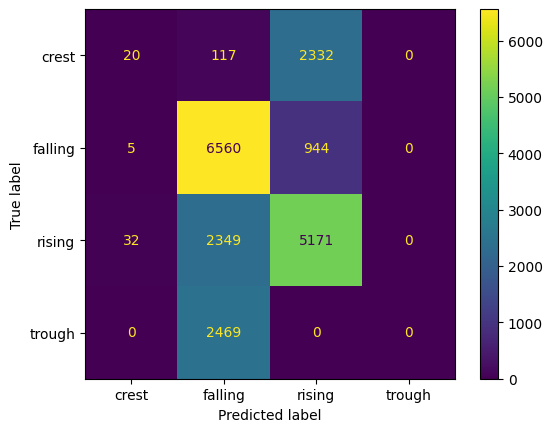

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [20]:
print(f"Voting Classification Report:\n{classification_report(y_test, y_pred)}")

c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Voting Classification Report:
              precision    recall  f1-score   support

       crest       0.35      0.01      0.02      2469
     falling       0.57      0.87      0.69      7509
      rising       0.61      0.68      0.65      7552
      trough       0.00      0.00      0.00      2469

    accuracy                           0.59     19999
   macro avg       0.38      0.39      0.34     19999
weighted avg       0.49      0.59      0.51     19999



c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
from joblib import dump

dump(voting_clf_1, 'model_voting_1.joblib')


['model_voting_1.joblib']

In [22]:
from joblib import load

loaded_model = load('model_noisy_trough_crest_PassiveAG Classifier.joblib')

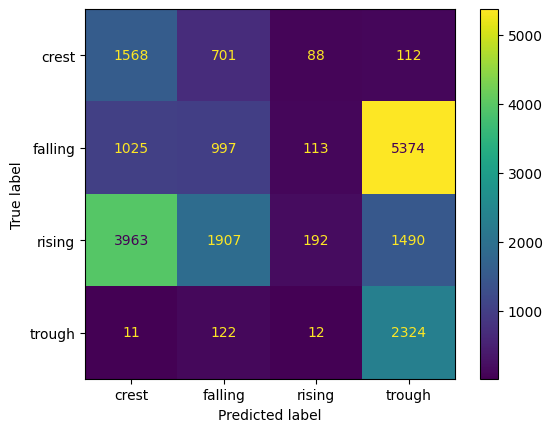

In [23]:
y_pred = loaded_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [24]:
loaded_model = load('model_noisy_crest_QuadraticDA_Classifier.joblib')

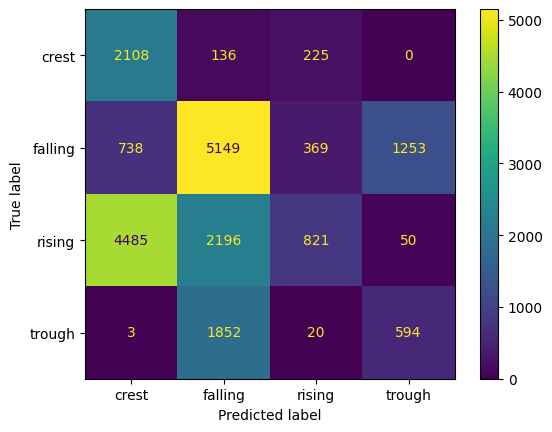

In [25]:
y_pred = loaded_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

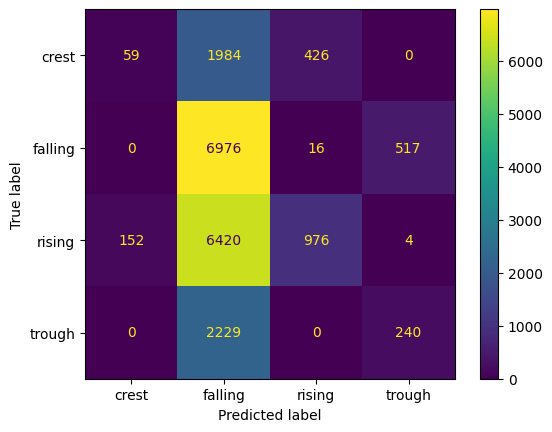

Voting Classification Report:
              precision    recall  f1-score   support

       crest       0.28      0.02      0.04      2469
     falling       0.40      0.93      0.56      7509
      rising       0.69      0.13      0.22      7552
      trough       0.32      0.10      0.15      2469

    accuracy                           0.41     19999
   macro avg       0.42      0.29      0.24     19999
weighted avg       0.48      0.41      0.31     19999



In [26]:
clf=PassiveAggressiveClassifier(random_state=87)
clf.fit(X=X_train,y=y_train)
y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(f"Voting Classification Report:\n{classification_report(y_test, y_pred)}")


In [27]:
dfMain=data_frame(pair_name="dfUltimate_Moving Average Trends_STEP_2024_M1_9_3_14_20_99999.csv")
y=dfMain["Peak"]
X=pd.DataFrame(data={'col1':dfMain["CCI"],'col2':dfMain["MBand"]})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

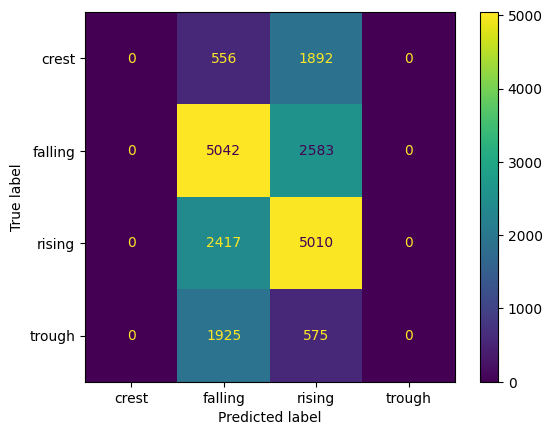

c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Voting Classification Report:
              precision    recall  f1-score   support

       crest       0.00      0.00      0.00      2448
     falling       0.51      0.66      0.57      7625
      rising       0.50      0.67      0.57      7427
      trough       0.00      0.00      0.00      2500

    accuracy                           0.50     20000
   macro avg       0.25      0.33      0.29     20000
weighted avg       0.38      0.50      0.43     20000



c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\manch\OneDrive\Documents\DEV\MachineLearning\hands_On_Machine_Learning\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
clf=LinearDiscriminantAnalysis()
clf.fit(X=X_train,y=y_train)
y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(f"Voting Classification Report:\n{classification_report(y_test, y_pred)}")

In [29]:
def get_next_items(x):
  """
  This function takes a list `x` and returns a new list `y` where y[i] is the next item in x[i].

  Args:
      x: A list of any data type.

  Returns:
      A new list `y` containing the next items in `x`, or None if the list is empty.

  Raises:
      IndexError: If the list has only one element.
  """
  if not x:
    return None  # Handle empty list case

  # Create a new list to store the next items
  y = []

  # Loop through the original list, but stop one element before the end
  for i in range(len(x) - 1):
    y.append(x[i + 1])

  # Raise an error if there's only one element (no "next" item)
  if len(x) == 1:
    raise IndexError("List has only one element, no next item exists.")

  return y


In [30]:
import numpy as np
X=dfMain["Slope Ma"].to_list()
y=get_next_items(x=X)
print(len(y),len(X))
X=X[:len(X)-1]
X=np.reshape(X,(len(X),1))
X.shape



99998 99999


(99998, 1)

In [31]:
X_train, X_test, y_train, y_test = X[:80000], X[80000:], y[:80000], y[80000:]
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()


lin_reg.fit(X_train, y_train)



LinearRegression()

In [32]:


from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_true=y_test, y_pred=lin_reg.predict(X_test))
lin_rmse = np.sqrt(lin_mse)
lin_rmse


np.float64(0.23365360421155718)

In [33]:

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X_train, y_train)
ridge_reg_mse = mean_squared_error(y_true=y_test, y_pred=lin_reg.predict(X_test))
lin_rmse = np.sqrt(ridge_reg_mse)
lin_rmse

np.float64(0.23365360421155718)

In [34]:
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):
    """
    This function calculates the Mean Absolute Percentage Error (MAPE) between two arrays.

    Args:
        y_true: The ground truth labels.
        y_pred: The predicted labels.

    Returns:
        The MAPE value as a float.
    """
    # Avoid zero division by adding a small constant
    epsilon = 1e-8
    # Clip predicted values to avoid division by zero (optional)
    y_pred = np.clip(y_pred, epsilon, np.inf)
    # Calculate the absolute errors
    absolute_errors = np.abs(y_true - y_pred)
    # Calculate the percentage errors
    percentage_errors = (absolute_errors / y_true) * 100

    # Return the mean of the percentage errors
    return np.mean(percentage_errors)

# Assuming you have housing_labels and housing_predictions
housing_mape = mean_absolute_percentage_error(y_true=y_test, y_pred=lin_reg.predict(X_test))
print("Mean Absolute Percentage Error:", round(housing_mape),"%")

Mean Absolute Percentage Error: -101 %
